In [14]:
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
data = pd.read_csv("../../Model/cleaned_dataset.csv")
backup_data = pd.read_csv("../../Model/cleaned_dataset.csv")

In [2]:
data.drop(columns=['Posting Month'])
X = data.drop(columns=['Price','Posting Month'])  
y = data['Price']

In [3]:
X.shape, y.shape

((5128, 11), (5128,))

In [4]:
categorical_columns = ['Manufacturer', 'Model', 'Transmission', 'Fuel', 'country_of_origin']
numerical_columns = ['Horse Power', 'Mileage', 'Posting Year', 'Age', 'price_per_km', 'price_per_horsepower']

In [5]:
ct = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(sparse_output=False), categorical_columns),  # Encode categorical features
    ],
    remainder='passthrough'  # Pass numerical features as-is
)

In [6]:
X_encoded = ct.fit_transform(X)

In [7]:
encoded_feature_names = (
    ct.named_transformers_['cat'].get_feature_names_out(categorical_columns).tolist()
    + numerical_columns
)
X_encoded_df = pd.DataFrame(X_encoded, columns=encoded_feature_names)

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size = 0.2, random_state = 0)

In [9]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((4102, 805), (1026, 805), (4102,), (1026,))

----------------------------------MODEL--------------------------------------------

Plotting a histogram to visualize the car market in accordance with the dataset.

In [10]:
data.describe()

,Price,Horse Power,Mileage,Posting Year,Age,price_per_km,price_per_horsepower
count,5128.000000,5128.000000,5128.000000,5128.000000,5128.000000,5128.000000,5128.000000
mean,51090.844189,6.723284,158303.039002,2023.221139,10.775741,1.091355,7457.340127
std,49092.403148,3.491983,83271.481696,0.517912,6.878875,7.998106,4637.238419
min,4000.000000,1.000000,900.000000,2022.000000,0.000000,0.012341,209.523810
25%,25000.000000,5.000000,94807.500000,2023.000000,6.000000,0.130435,4375.000000
50%,38000.000000,6.000000,150000.000000,2023.000000,9.000000,0.276217,6500.000000
75%,60000.000000,7.000000,208000.000000,2024.000000,14.000000,0.568182,9400.000000
max,748000.000000,65.000000,600000.000000,2024.000000,44.000000,285.000000,65000.000000


C:\Users\Msi Rtx\AppData\Local\Temp\ipykernel_24092\3957424656.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Price'])


Text(0.5, 1.0, 'Sales data distribution')

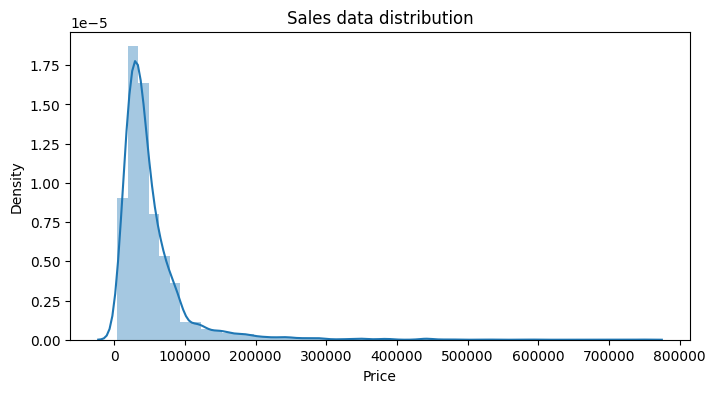

In [11]:
fig=plt.figure(figsize=(8,4))
sns.distplot(data['Price'])
plt.title('Sales data distribution')

Plotting a heat map to analyze the data and keep an eye on the co-relation between labels.

<Axes: >

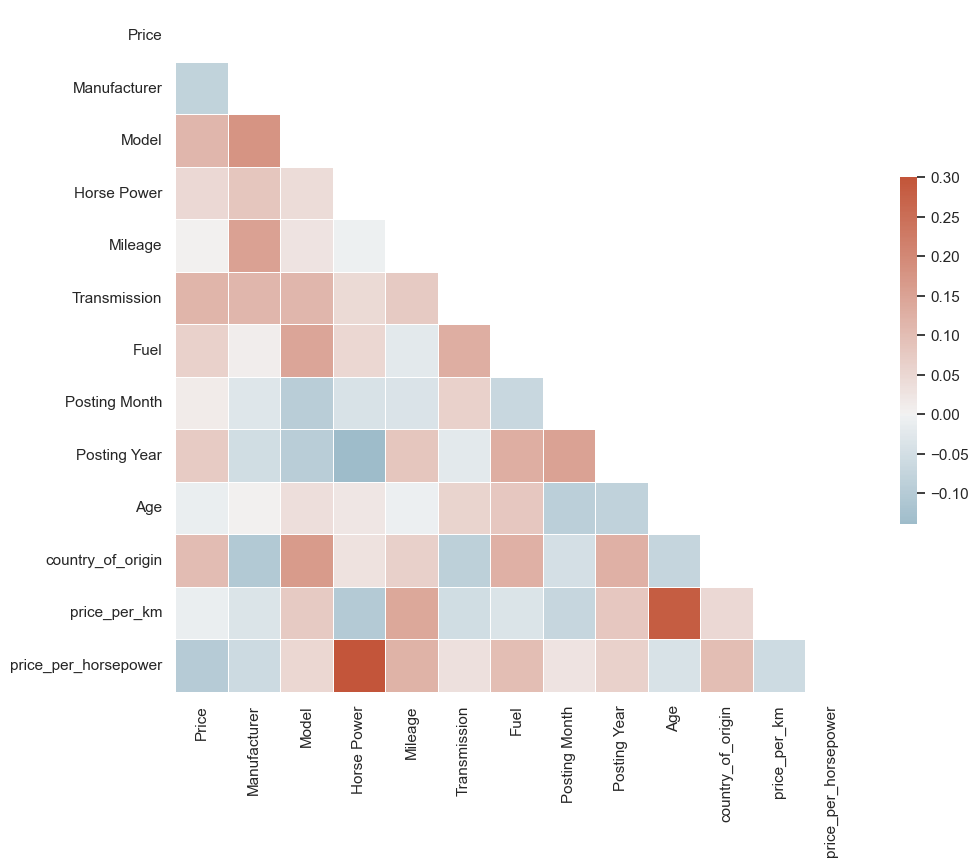

In [13]:
sns.set_theme(style="white")
rs = np.random.RandomState(33)
d = pd.DataFrame(data=rs.normal(size=(100, 13)),
                 columns=list(data))
corr = d.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [10]:
error_mean_absolute = []
error_mean_absolute.append(2418.28)
error_mean_absolute.append(319.79)
error_mean_absolute.append(1427.73)

error_mean_square = []
error_mean_square.append(14624129.13)
error_mean_square.append(923432.92)
error_mean_square.append(10379259.73)

R_squared = []
R_squared.append(0.96)
R_squared.append(0.99)
R_squared.append(0.97)



In [11]:
import pandas as pd
data = {'Models': ['Linear Regression', 'Random Forest Regression', 'Decision Tree Regression'], 'Mean Absolute Error': error_mean_absolute, 'Mean Squared Error': error_mean_square, 'R-squared': R_squared}
model_dataframe = pd.DataFrame(data)

In [12]:
model_dataframe


,Models,Mean Absolute Error,Mean Squared Error,R-squared
0,Linear Regression,2418.28,14624129.13,0.96
1,Random Forest Regression,319.79,923432.92,0.99
2,Decision Tree Regression,1427.73,10379259.73,0.97


C:\Users\Msi Rtx\AppData\Local\Temp\ipykernel_28656\4062102824.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  splot = sns.barplot(data = model_dataframe, x = 'Models', y = 'Mean Absolute Error', palette = 'Paired')


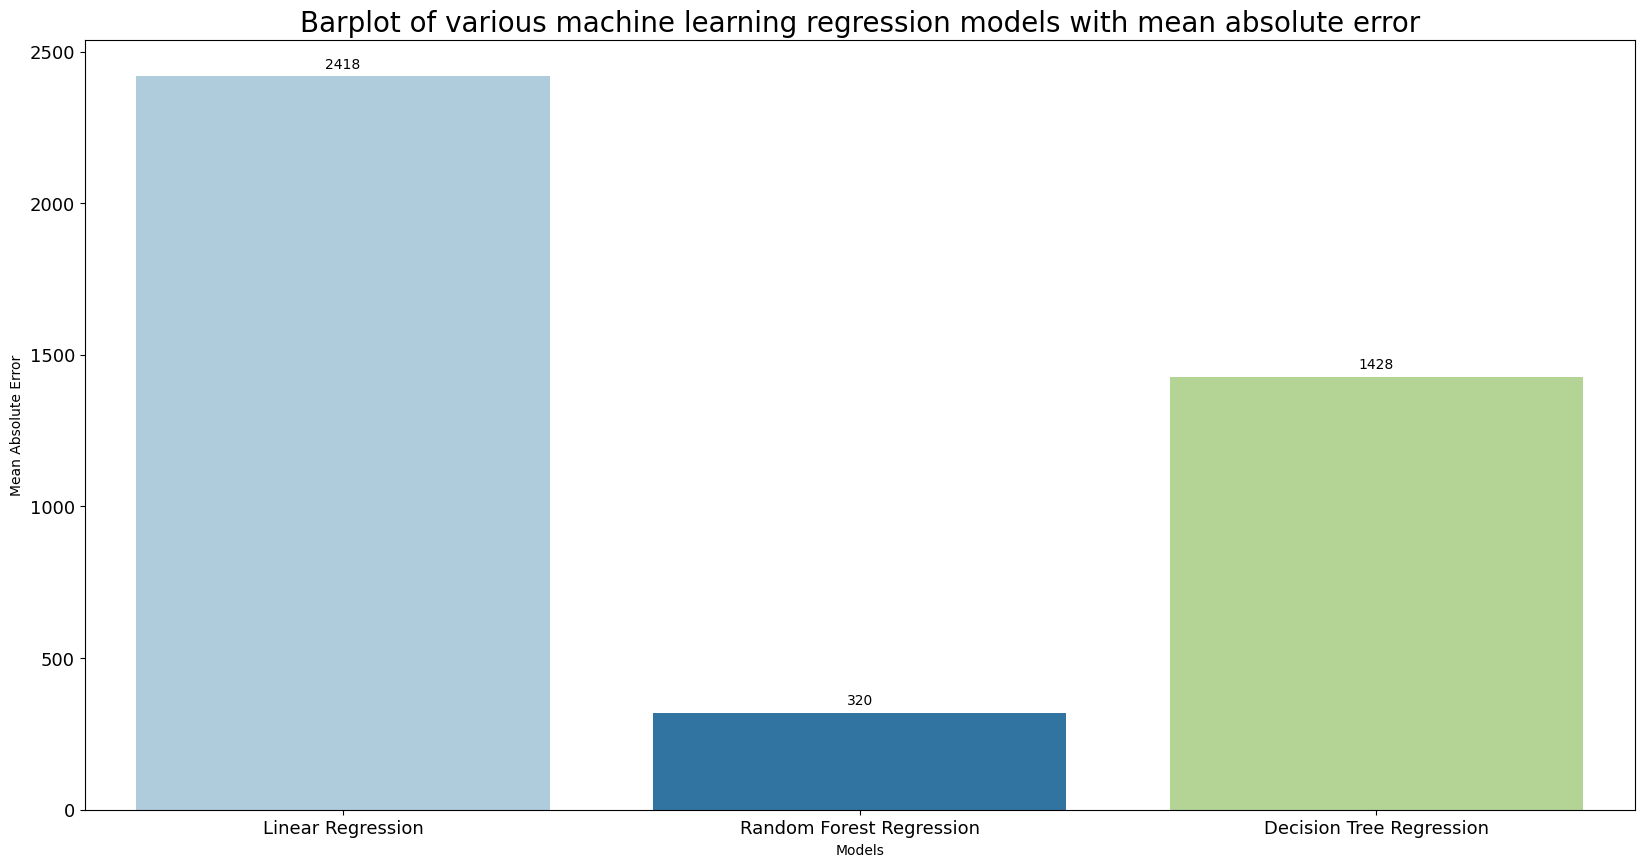

In [15]:

plt.figure(figsize = (20, 10))
splot = sns.barplot(data = model_dataframe, x = 'Models', y = 'Mean Absolute Error', palette = 'Paired')
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.0f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')
plt.xticks(fontsize = 13)
plt.yticks(fontsize = 13)
plt.title("Barplot of various machine learning regression models with mean absolute error", fontsize = 20)
plt.show()

C:\Users\Msi Rtx\AppData\Local\Temp\ipykernel_28656\440463106.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  splot = sns.barplot(data = model_dataframe, x = 'Models', y = 'Mean Squared Error', palette = 'Spectral')


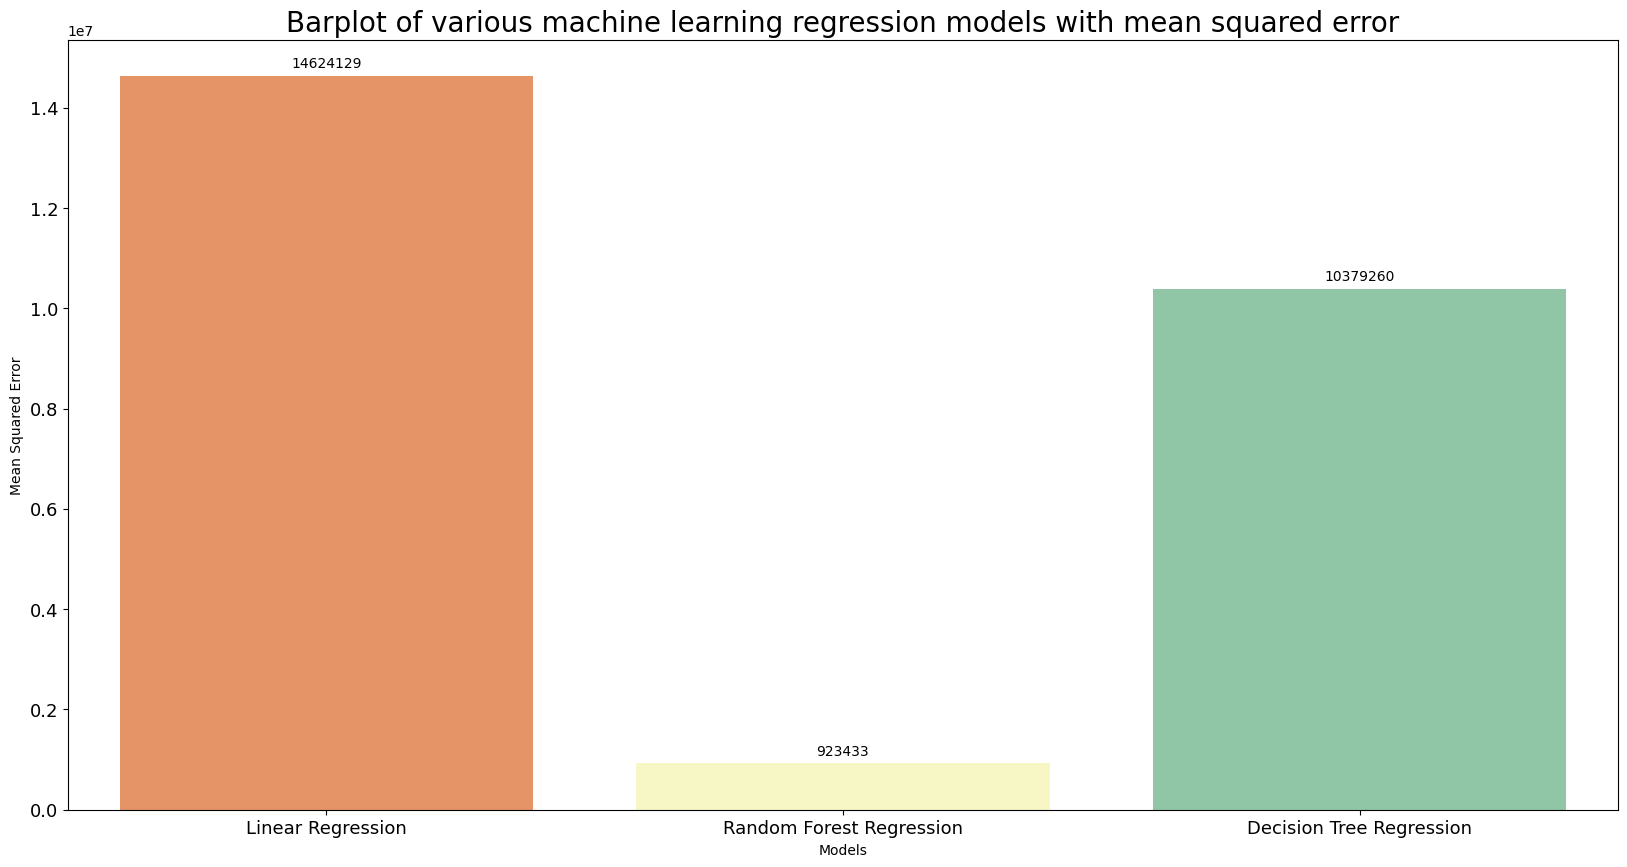

In [16]:
plt.figure(figsize = (20, 10))
splot = sns.barplot(data = model_dataframe, x = 'Models', y = 'Mean Squared Error', palette = 'Spectral')
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.0f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')
plt.xticks(fontsize = 13)
plt.yticks(fontsize = 13)
plt.title("Barplot of various machine learning regression models with mean squared error", fontsize = 20)
plt.show()

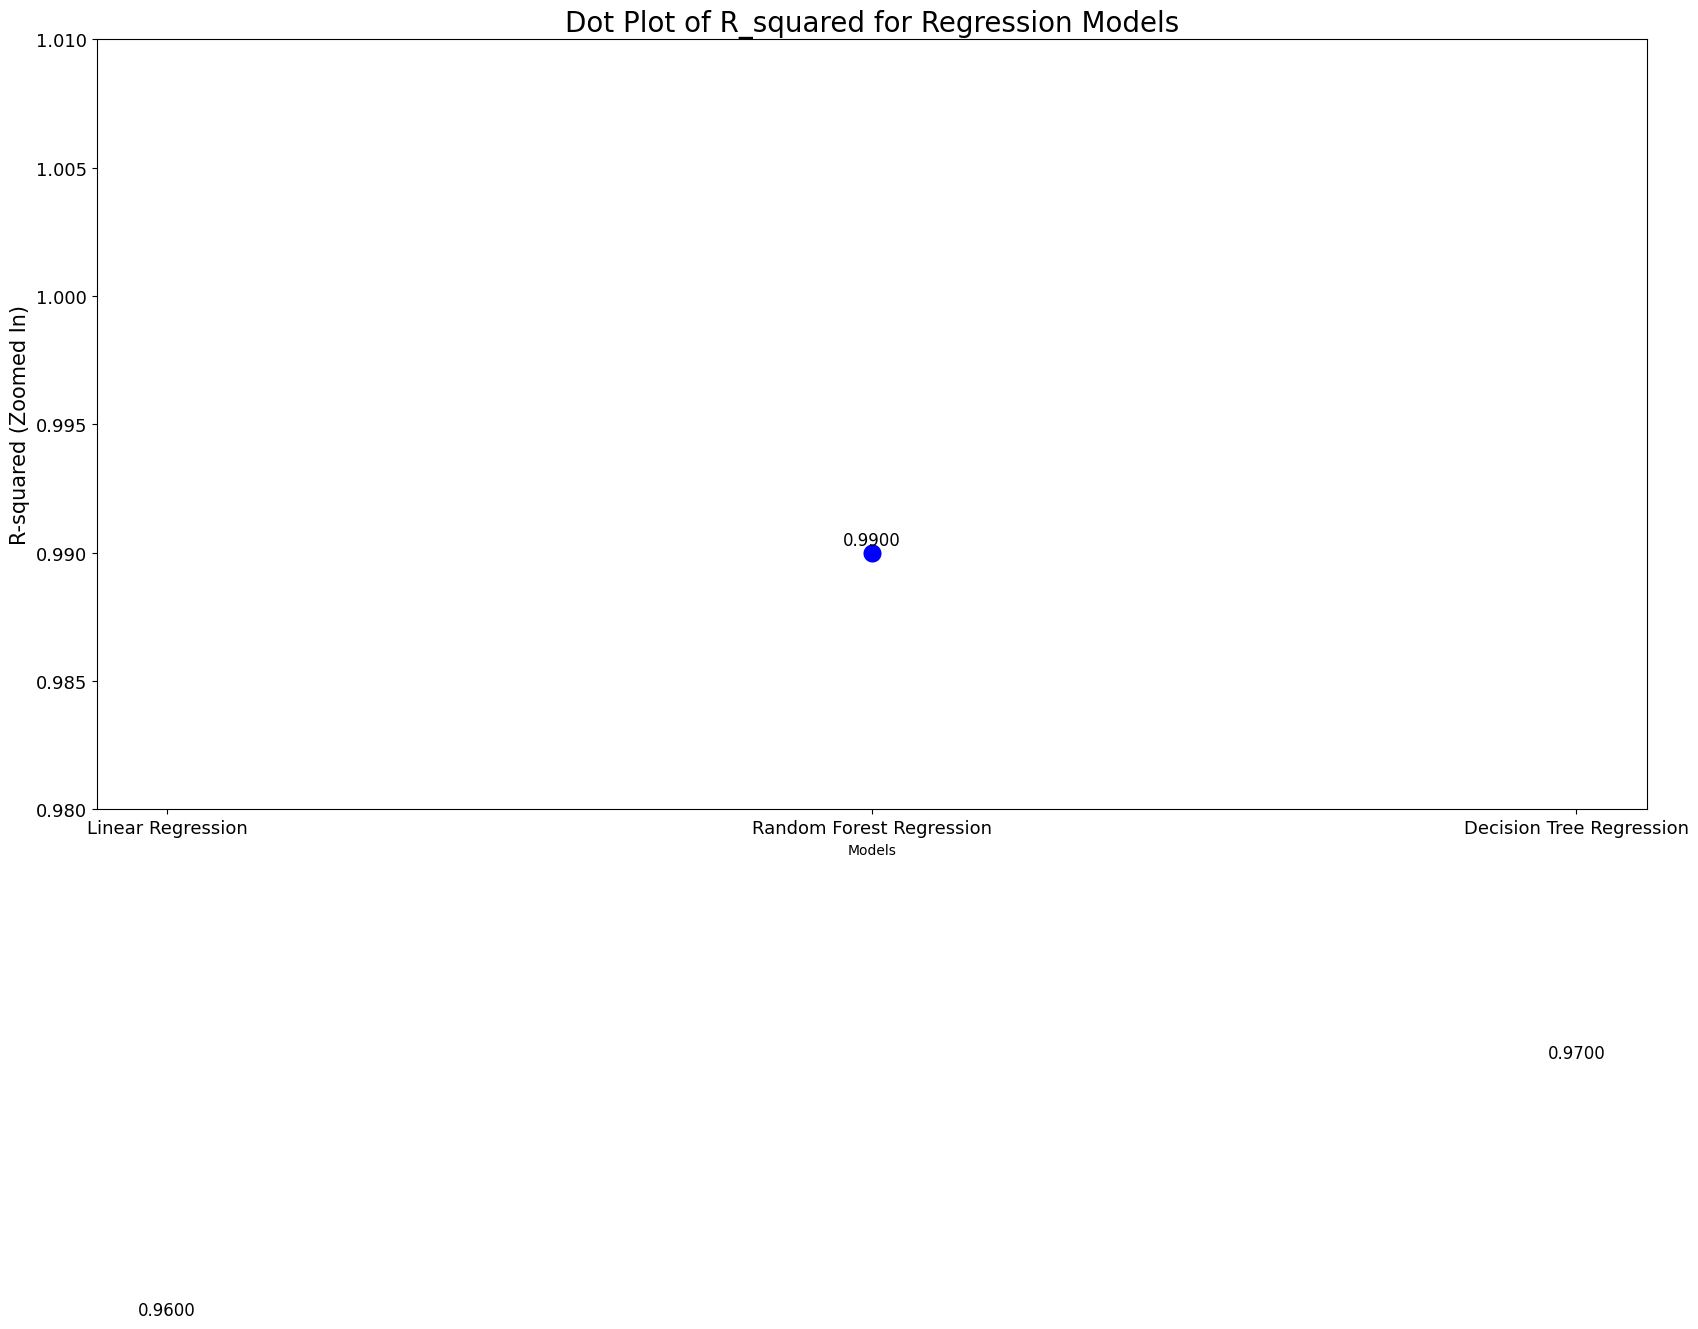

In [19]:
plt.figure(figsize=(20, 10))
sns.scatterplot(data=model_dataframe, x='Models', y='R-squared', s=200, color='blue', marker='o')

# Annotate each point with its exact R-squared value
for i, value in enumerate(model_dataframe['R-squared']):
    plt.text(i, value + 0.0003, f"{value:.4f}", ha='center', fontsize=12)

plt.ylim(0.98, 1.01)  # Focus on the range
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.title("Dot Plot of R_squared for Regression Models", fontsize=20)
plt.ylabel("R-squared (Zoomed In)", fontsize=15)
plt.show()
